In [1]:
#Needed Libararies

# working with data
import os
import numpy as np
import pandas as pd
import geopandas as gpd

# visulizaiton
import matplotlib.pyplot as plt
import seaborn as sns

# API retrieval
import requests
import json

# Cleanup
from datetime import datetime
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook

In [2]:
# check working directory, change if need be
os.getcwd()

'C:\\Users\\rjame\\Documents\\WSWC Documents\\WaDE-Side-Projects\\20230103 Cross Analysis WSType POU-to-POD'

In [3]:
# file input.  Create Dataframe
# read in zip file
import zipfile
fileInput = "Query_Results.zip"
df = pd.read_csv('Query_Results.zip',compression='zip').drop_duplicates().reset_index(drop=True)
print(len(df))
df.head(1)

2190638


,AllocationUUID,PODSitePOUSiteFactID,POUSUUID,POUCheck,POUWSUUID,POUWaDEWSType,PODSUUID,PODCheck,PODWSUUID,PODWaDEWSType
0,AZwr_WR1008,2321439,AZwr_S111807,POU,AZwr_WS544,Surface Water,AZwr_S56817,POD,AZwr_WS544,Surface Water


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190638 entries, 0 to 2190637
Data columns (total 10 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   AllocationUUID        object
 1   PODSitePOUSiteFactID  int64 
 2   POUSUUID              object
 3   POUCheck              object
 4   POUWSUUID             object
 5   POUWaDEWSType         object
 6   PODSUUID              object
 7   PODCheck              object
 8   PODWSUUID             object
 9   PODWaDEWSType         object
dtypes: int64(1), object(9)
memory usage: 167.1+ MB


In [5]:
# Unique Entries for POU WaterSourceTypeCV
df['POUWaDEWSType'].unique()

array(['Surface Water', 'Groundwater', 'Reuse', 'Unspecified'],
      dtype=object)

In [6]:
# Num of Unique WRs with a POU connected to a POD.
df['AllocationUUID'].nunique()

297195

In [7]:
# Num of Unique POUs tied to a WR connected to a POD
df['POUSUUID'].nunique()

333003

### Q1: For a WR, if POU has a listed WaterSourceTypeCV, how often does it conflict with the listed POD WaterSourceTypeCV of the same wr? 

In [16]:
df1 = df.copy()
df1 = df1[['AllocationUUID', 'POUSUUID', 'POUWaDEWSType', 'PODWaDEWSType']].drop_duplicates().reset_index(drop=True)
print(len(df1))
df1.head(1)

377950


,AllocationUUID,POUSUUID,POUWaDEWSType,PODWaDEWSType
0,AZwr_WR1008,AZwr_S111807,Surface Water,Surface Water


##### Surface Water

178819
Surface Water    171958
Groundwater        3910
Unspecified        2822
Reuse               129
Name: PODWaDEWSType, dtype: int64


<AxesSubplot:>

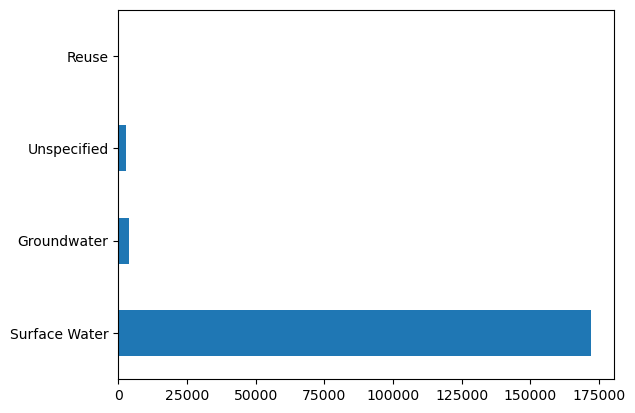

In [9]:
df1_sw = df1[df1['POUWaDEWSType']=='Surface Water'].reset_index(drop=True)
print(len(df1_sw))
print(df1_sw['PODWaDEWSType'].value_counts())
df1_sw['PODWaDEWSType'].value_counts().plot(kind='barh')

##### Groundwater

186194
Groundwater      179767
Surface Water      4244
Unspecified        2162
Reuse                21
Name: PODWaDEWSType, dtype: int64


<AxesSubplot:>

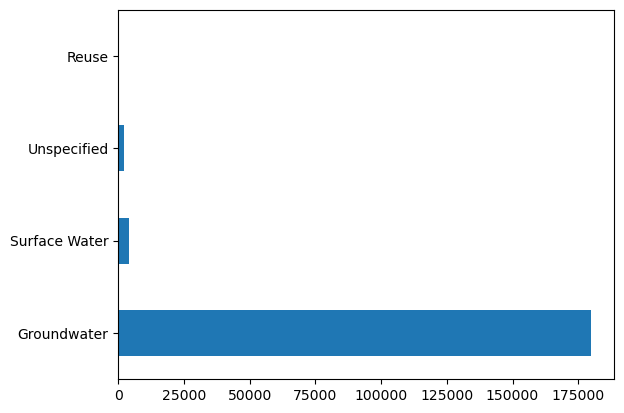

In [10]:
df1_gw = df1[df1['POUWaDEWSType']=='Groundwater'].reset_index(drop=True)
print(len(df1_gw))
print(df1_gw['PODWaDEWSType'].value_counts())
df1_gw['PODWaDEWSType'].value_counts().plot(kind='barh')

#### Reuse

1482
Reuse            1372
Surface Water     100
Groundwater        10
Name: PODWaDEWSType, dtype: int64


<AxesSubplot:>

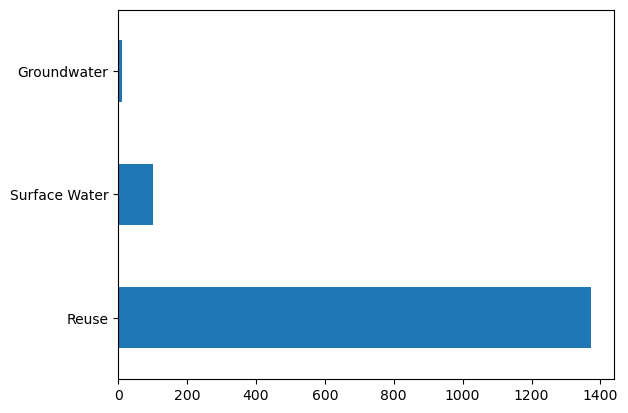

In [11]:
df1_r = df1[df1['POUWaDEWSType']=='Reuse'].reset_index(drop=True)
print(len(df1_r))
print(df1_r['PODWaDEWSType'].value_counts())
df1_r['PODWaDEWSType'].value_counts().plot(kind='barh')

##### Unspecified

11455
Unspecified      10244
Surface Water     1038
Groundwater        173
Name: PODWaDEWSType, dtype: int64


<AxesSubplot:>

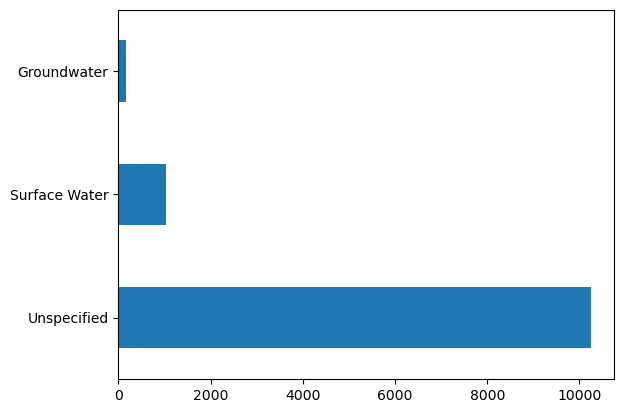

In [12]:
df1_u = df1[df1['POUWaDEWSType']=='Unspecified'].reset_index(drop=True)
print(len(df1_u))
print(df1_u['PODWaDEWSType'].value_counts())
df1_u['PODWaDEWSType'].value_counts().plot(kind='barh')

### Q2: For a WR, if POU list WaterSourceTypeCV as "Unspecified", how often do the connecting POD(s) have a mixed WaterSourceTypeCV of the same wr (e.g., one POD as surface water, one POD as groundwater)?

In [13]:
df2 = df.copy()
df2 = df2[df2['POUWaDEWSType']=='Unspecified'].reset_index(drop=True)
df2 = df2.groupby(['AllocationUUID', 'POUSUUID']).agg(lambda x: ", ".join([str(elem) for elem in (list(set(x)))])).replace(np.nan, "").reset_index()
print(len(df2))
df2.head(1)

11161


,AllocationUUID,POUSUUID,PODSitePOUSiteFactID,POUCheck,POUWSUUID,POUWaDEWSType,PODSUUID,PODCheck,PODWSUUID,PODWaDEWSType
0,IDwr_WR100684,IDwr_S316471,"4763960, 4751965",POU,IDwr_WS3685,Unspecified,"IDwr_S84218, IDwr_S84219",POD,IDwr_WS3685,Unspecified


Unspecified                                10011
Surface Water                                814
Surface Water, Unspecified                   163
Groundwater                                   94
Groundwater, Surface Water, Unspecified       52
Groundwater, Unspecified                      18
Groundwater, Surface Water                     9
Name: PODWaDEWSType, dtype: int64


<AxesSubplot:>

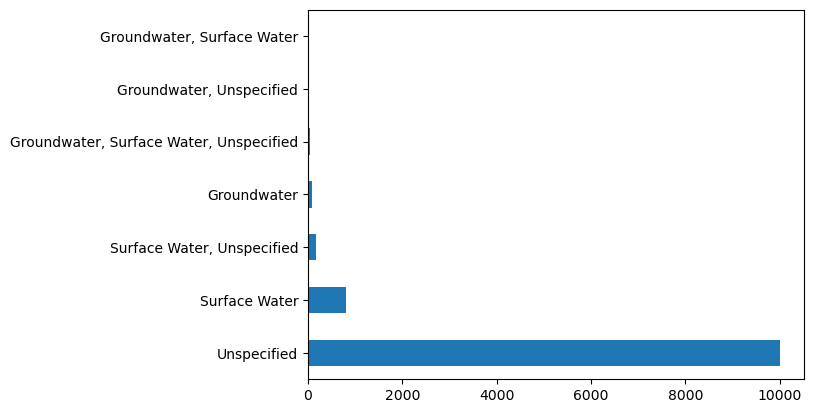

In [14]:
# Count of Unique POD WaterSourceTypeCV per WR POU = "Unspecified" Combo.
print(df2['PODWaDEWSType'].value_counts())
df2['PODWaDEWSType'].value_counts().plot(kind='barh')